# Machine Predictive Maintenance Classification

# Importing the required libraries 

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Loading the dataset

In [2]:
# Load the  data

MachData = pd.read_csv(r"D:\SRKR-INTERNSHIP-JULY\mydatasets\predictive_maintenance.csv", header=0)

# Copy to back-up file

MachData_bk = MachData.copy()

# Display first 5 values

MachData.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
#Dataset Information

MachData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Deleting unwanted columns

In [4]:
del MachData['UDI']
del MachData['Product ID']
del MachData['Failure Type']

MachData.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


# Creating Dummies

In [5]:

cat_cols = ['Type']

MachData = pd.get_dummies(MachData,columns=cat_cols)

MachData = pd.DataFrame(MachData)

MachData.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


# Identify the independent and Target variables

In [6]:

IndepVar = []
for col in MachData.columns:
    
    if col != 'Target':
        IndepVar.append(col)

TargetVar = 'Target'

x = MachData[IndepVar]
y = MachData[TargetVar]

# Splitting the dataset into train and test

In [7]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((7000, 8), (3000, 8), (7000,), (3000,))

# Scaling the features by using MinMaxScaler

In [8]:


from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

# Loading the result dataset

In [10]:

MResults = pd.read_csv(r"D:\SRKR-INTERNSHIP-JULY\22nd July\HTResults.csv", header=0)
MResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Building the Calssification models and compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[   6   96]
 [   0 2898]]
Outcome values : 
 6 96 0 2898
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.06      0.11       102
           0       0.97      1.00      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.98      0.53      0.55      3000
weighted avg       0.97      0.97      0.95      3000

Accuracy : 96.8 %
Precision : 100.0 %
Recall : 5.9 %
F1 Score : 0.111
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 53.0 %
MCC : 0.239
roc_auc_score: 0.529


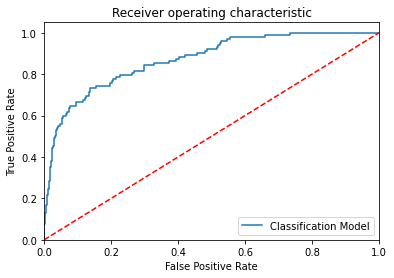

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  82   20]
 [ 108 2790]]
Outcome values : 
 82 20 108 2790
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.80      0.56       102
           0       0.99      0.96      0.98      2898

    accuracy                           0.96      3000
   macro avg       0.71      0.88      0.77      3000
weighted avg       0.97      0.96      0.96      3000

Accuracy : 95.7 %
Precision : 43.2 %
Recall : 80.4 %
F1 Score : 0.562
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 88.4 %
MCC : 0.57
roc_auc_score: 0.883


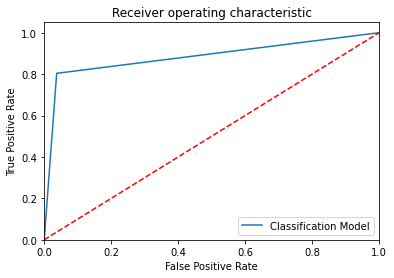

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  64   38]
 [  42 2856]]
Outcome values : 
 64 38 42 2856
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.63      0.62       102
           0       0.99      0.99      0.99      2898

    accuracy                           0.97      3000
   macro avg       0.80      0.81      0.80      3000
weighted avg       0.97      0.97      0.97      3000

Accuracy : 97.3 %
Precision : 60.4 %
Recall : 62.7 %
F1 Score : 0.615
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 80.6 %
MCC : 0.602
roc_auc_score: 0.806


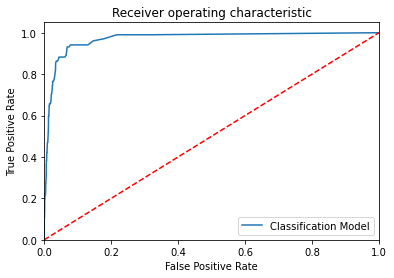

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  39   63]
 [  26 2872]]
Outcome values : 
 39 63 26 2872
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.38      0.47       102
           0       0.98      0.99      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.79      0.69      0.73      3000
weighted avg       0.97      0.97      0.97      3000

Accuracy : 97.0 %
Precision : 60.0 %
Recall : 38.2 %
F1 Score : 0.467
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 68.6 %
MCC : 0.465
roc_auc_score: 0.687


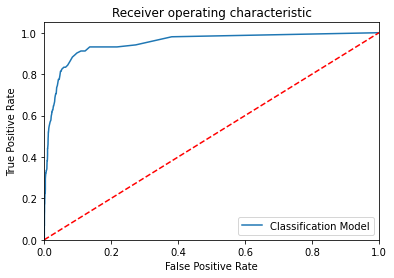

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  30   72]
 [  28 2870]]
Outcome values : 
 30 72 28 2870
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.29      0.38       102
           0       0.98      0.99      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.75      0.64      0.68      3000
weighted avg       0.96      0.97      0.96      3000

Accuracy : 96.7 %
Precision : 51.7 %
Recall : 29.4 %
F1 Score : 0.375
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 64.2 %
MCC : 0.374
roc_auc_score: 0.642


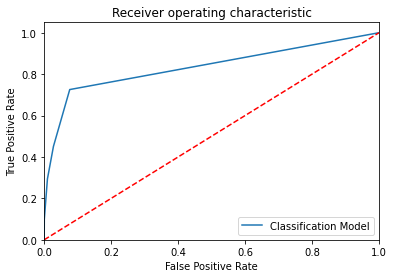

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[  11   91]
 [   2 2896]]
Outcome values : 
 11 91 2 2896
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.11      0.19       102
           0       0.97      1.00      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.91      0.55      0.59      3000
weighted avg       0.97      0.97      0.96      3000

Accuracy : 96.9 %
Precision : 84.6 %
Recall : 10.8 %
F1 Score : 0.191
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 55.4 %
MCC : 0.296
roc_auc_score: 0.554


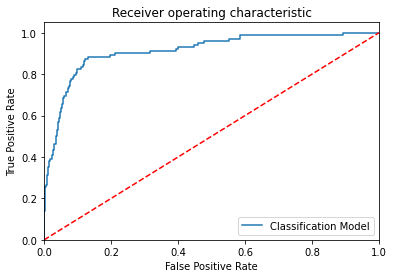

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  83   19]
 [  73 2825]]
Outcome values : 
 83 19 73 2825
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.81      0.64       102
           0       0.99      0.97      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.76      0.89      0.81      3000
weighted avg       0.98      0.97      0.97      3000

Accuracy : 96.9 %
Precision : 53.2 %
Recall : 81.4 %
F1 Score : 0.643
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 89.4 %
MCC : 0.644
roc_auc_score: 0.894


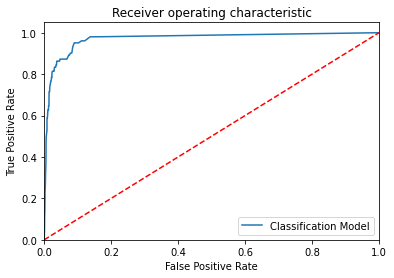

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[  76   26]
 [  70 2828]]
Outcome values : 
 76 26 70 2828
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.75      0.61       102
           0       0.99      0.98      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.76      0.86      0.80      3000
weighted avg       0.97      0.97      0.97      3000

Accuracy : 96.8 %
Precision : 52.1 %
Recall : 74.5 %
F1 Score : 0.613
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 86.0 %
MCC : 0.607
roc_auc_score: 0.86


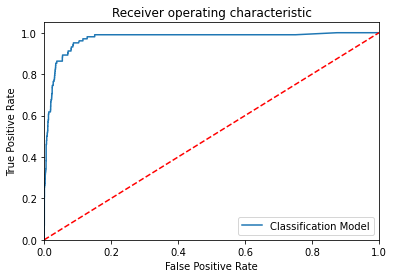

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  79   23]
 [  64 2834]]
Outcome values : 
 79 23 64 2834
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.77      0.64       102
           0       0.99      0.98      0.98      2898

    accuracy                           0.97      3000
   macro avg       0.77      0.88      0.81      3000
weighted avg       0.98      0.97      0.97      3000

Accuracy : 97.1 %
Precision : 55.2 %
Recall : 77.5 %
F1 Score : 0.645
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 87.6 %
MCC : 0.64
roc_auc_score: 0.876


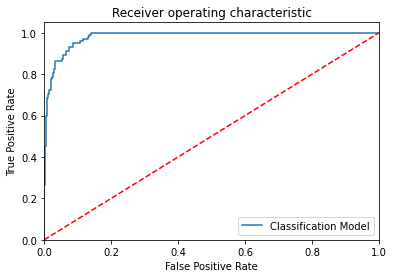

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  23   79]
 [  59 2839]]
Outcome values : 
 23 79 59 2839
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.23      0.25       102
           0       0.97      0.98      0.98      2898

    accuracy                           0.95      3000
   macro avg       0.63      0.60      0.61      3000
weighted avg       0.95      0.95      0.95      3000

Accuracy : 95.4 %
Precision : 28.0 %
Recall : 22.5 %
F1 Score : 0.25
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 60.2 %
MCC : 0.228
roc_auc_score: 0.603


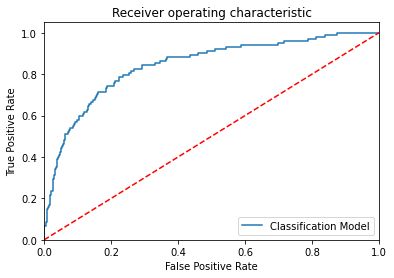

-----------------------------------------------------------------------------------------------------


In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
 bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
  init=None,
random_state=None,
 max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
 validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    # actual values
    actual = y_test
    # predicted values
    predicted = y_pred
    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    # Matthews Correlation Coefficient (MCC). Range of values of MCC liebetween -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%' )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
    'True Positive' : tp,
    'False Negative' : fn,
    'False Positive' : fp,
    'True Negative' : tn,
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : sensitivity,
    'F1 Score' : f1Score,
    'Specificity' : specificity,
    'MCC':MCC,
    'ROC_AUC_Score':roc_auc_score(actual, predicted),
    'Balanced Accuracy':balanced_accuracy}
    MResults = MResults.append(new_row, ignore_index=True)
 #----------------------------------------------------------------------------------------------------------

# Results

In [12]:
MResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6,96,0,2898,0.968,1.000,0.059,0.111,1.000,0.239,0.529412,0.530
1,DecisionTreeClassifier(),82,20,108,2790,0.957,0.432,0.804,0.562,0.963,0.570,0.883327,0.884
2,"(DecisionTreeClassifier(max_features='sqrt', r...",64,38,42,2856,0.973,0.604,0.627,0.615,0.986,0.602,0.806479,0.806
3,"(ExtraTreeClassifier(random_state=816446904), ...",39,63,26,2872,0.970,0.600,0.382,0.467,0.991,0.465,0.686691,0.686
4,KNeighborsClassifier(),30,72,28,2870,0.967,0.517,0.294,0.375,0.990,0.374,0.642228,0.642
5,SVC(probability=True),11,91,2,2896,0.969,0.846,0.108,0.191,0.999,0.296,0.553577,0.554
6,(DecisionTreeClassifier(random_state=193140905...,83,19,73,2825,0.969,0.532,0.814,0.643,0.975,0.644,0.894268,0.894
7,([DecisionTreeRegressor(criterion='friedman_ms...,76,26,70,2828,0.968,0.521,0.745,0.613,0.976,0.607,0.860472,0.860
8,LGBMClassifier(),79,23,64,2834,0.971,0.552,0.775,0.645,0.978,0.640,0.876213,0.876
9,GaussianNB(),23,79,59,2839,0.954,0.280,0.225,0.250,0.980,0.228,0.602566,0.602


In [13]:
MResults.to_csv("D:\\SRKR-INTERNSHIP-JULY\\MResults.csv",index=False)